In [72]:
import pandas as pd

In [73]:
df= pd.read_csv("heart.csv" , sep=',')

In [74]:
df.shape

(918, 12)

In [75]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
# Step 1: Detect binary columns
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]

In [78]:
# Step 2: Label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [79]:

# Step 3: One-hot encode columns with more than 2 categories
multi_cat_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]
df = pd.get_dummies(df, columns=multi_cat_cols)

In [80]:
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,1,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,1,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,1,False,True,False,False,True,False,False,False,True,False


In [81]:
x=df.drop("HeartDisease" ,axis =1)
y=df["HeartDisease"]

In [82]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

In [83]:
x_scaled

array([[-1.4331398 ,  0.51595242,  0.41090889, ..., -0.27144836,
        -1.00218103,  1.15067399],
       [-0.47848359, -1.93816322,  1.49175234, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.75135854,  0.51595242, -0.12951283, ..., -0.27144836,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972,  0.51595242, -0.12951283, ..., -0.27144836,
         0.99782372, -0.86905588],
       [ 0.37009972, -1.93816322, -0.12951283, ..., -0.27144836,
         0.99782372, -0.86905588],
       [-1.64528563,  0.51595242,  0.30282455, ..., -0.27144836,
        -1.00218103,  1.15067399]])

In [84]:
from sklearn.model_selection import train_test_split

# 1. Split your data
x_train , x_test ,y_train , y_test =train_test_split(x_scaled,y ,test_size=0.2 , random_state=30)


In [85]:
x_train.shape

(734, 18)

In [86]:
x_test.shape

(184, 18)

In [87]:
from sklearn.linear_model import LogisticRegression

model =LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)



LogisticRegression(max_iter=1000)

In [88]:
model.score(x_test,y_test)

0.8369565217391305

In [95]:
#Use PCA to reduce dimensions

x

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,False,True,False,False,True,False,False,False,True,False


In [96]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca= pca.fit_transform(x)

In [97]:
x_pca

array([[ 92.31147254,  29.44806292],
       [-17.14346713,  13.7395097 ],
       [ 81.90685965, -38.21983801],
       ...,
       [-69.00413303, -17.33712481],
       [ 39.20759707,  33.59546251],
       [-21.43735951,  37.21940557]])

In [98]:
x_pca.shape

(918, 2)

In [99]:
x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y , test_size=0.2 , random_state=30)



In [100]:
from sklearn.linear_model import LogisticRegression

model_pca =LogisticRegression()
model_pca.fit(x_pca_train,y_train)

LogisticRegression()

In [101]:
model_pca.score(x_pca_test,y_test)

0.7010869565217391

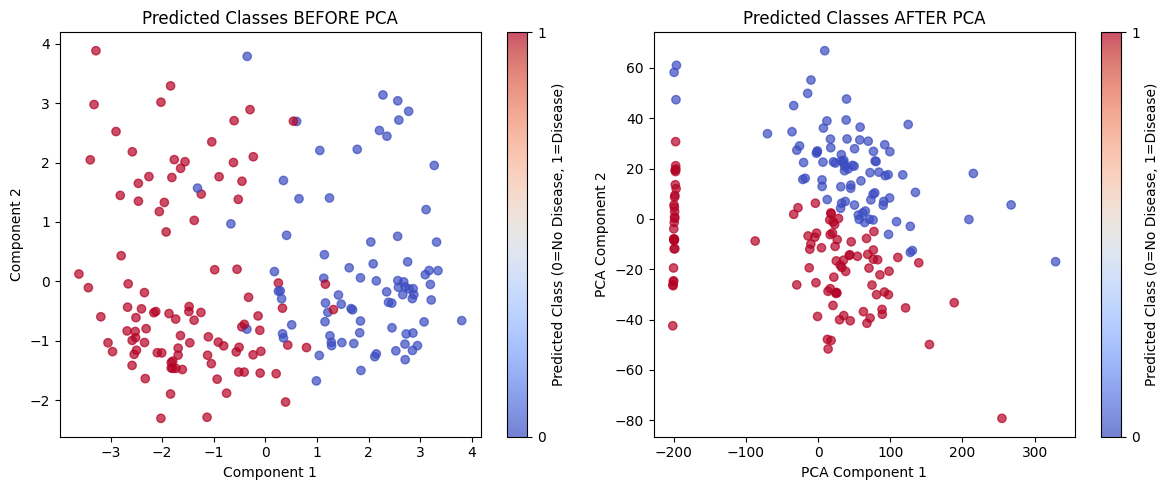

In [105]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume you have:
# X_test (your test features), y_test (true labels), model (trained logistic regression)
# And also after PCA you have model_pca (trained on PCA-transformed data), and X_test_pca

# 1. Visualize classification results BEFORE PCA (using first two features or after dimensionality reduction)

# If your X_test has more than 2 features, reduce to 2 just for plotting (optional)
if x_test.shape[1] > 2:
    pca_for_plot = PCA(n_components=2)
    X_test_2d = pca_for_plot.fit_transform(x_test)
else:
    X_test_2d = x_test

y_pred_before = model.predict(x_test)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_before, cmap='coolwarm', alpha=0.7)
plt.title('Predicted Classes BEFORE PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(ticks=[0,1], label='Predicted Class (0=No Disease, 1=Disease)')

# 2. Visualize classification results AFTER PCA

y_pred_after = model_pca.predict(x_pca_test)

plt.subplot(1,2,2)
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=y_pred_after, cmap='coolwarm', alpha=0.7)
plt.title('Predicted Classes AFTER PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(ticks=[0,1], label='Predicted Class (0=No Disease, 1=Disease)')

plt.tight_layout()
plt.show()

Conclusion:

The classification results visualized before applying PCA show some overlap between the two classes, indicating that the model finds it harder to distinctly separate patients with and without heart disease using the original high-dimensional features. After applying PCA to reduce the data to two principal components, the classes become more clearly separated in the plot. This demonstrates that PCA effectively captures the most important variance in the data, simplifying the feature space and making the classification boundaries clearer. Although PCA may sometimes slightly impact accuracy, it provides a valuable way to visualize complex data and often improves model interpretability and computational efficiency.